In this chapter, you get familiar with `SKlearn Pipeline` methods and use them to create an ML pipeline workflow. 

## **SKlearn Pipelines**

Before you learn how to create an ML pipeline workflow, let's discuss what `SKlearn Pipeline` is.

`SKlearn Pipeline` is the tool that assembles the several steps of the ML pipeline. It chains together the preprocessing steps with the model fitting stages ML development.

This tool consists of four steps that help to create ML workflow, which are:

### **Transformer**
  


This step is a part of the pre-processing step that transforms or imputes the data. The [fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion.fit_transform) method is an important method in it that fit all the transformers, transform the data and concatenate results. 

You can also create your own custom transformer as per your requirement.

### **Estimator**

   This step is for modeling. It consists of ML algorithms that fit or train on data. The [fit_predict](https://scikit-learn.org/stable/glossary.html#term-fit-predict) fits the model and returns the predictions.

NOTE: 
    
  You can use the `fit_transform` and `fit_predict` methods independently. That means `fit_transform` breaks into two separate methods `fit` and `transform`, and similarly, `fit_predict` breaks into `fit` and `predict`.

### **[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)**



 This step combines the above two modular steps into one composite estimator. It can also be used to chain multiple estimators into one. You use a list of tuples (key-name given to step, value-estimator) to the built pipeline.

NOTE([source]( https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators )): 

All estimators in a pipeline, except the last one, must be transformers (i.e., must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

The given example how you can create a simple pipeline.

In [0]:
## import the Pipeline package from sklearn.pipeline
from sklearn.pipeline import Pipeline
## import any estimator(here importing logistic regression)
from sklearn.linear_model import LogisticRegression
## importing normalizing technique StandardScalar
from sklearn.preprocessing import StandardScaler

## Building pipeline 
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('model', LogisticRegression())])
pipeline

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

You can also use fuction `make_pipeline` to build pipeline.

In [0]:
from sklearn.pipeline import make_pipeline

## using make_pipeline to create pipeline

make_pipeline(StandardScaler(), LogisticRegression())

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Here, you can see it takes a variable number of estimators and returns a pipeline, filling in the names automatically.

### **[FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion)**



FeatureUnion serves the same purposes as Pipeline. It combines several transformer objects into a new one. `Pipelines` and `FeatureUnion` can be combined as one to create complex models.

A simple example is as follows:

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer

feature_union = FeatureUnion([('scaler', StandardScaler()),
                    ('Binarizer', Binarizer())])
feature_union

FeatureUnion(n_jobs=None,
             transformer_list=[('scaler',
                                StandardScaler(copy=True, with_mean=True,
                                               with_std=True)),
                               ('Binarizer',
                                Binarizer(copy=True, threshold=0.0))],
             transformer_weights=None, verbose=False)

You can also use the function [make_union](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_union.html#sklearn.pipeline.make_union) to build `FeatureUnion`. Similar to `Pipeline`, you don't need to name the component. It aoutmatically fills it.

In [0]:
from sklearn.pipeline import make_union

make_union(StandardScaler(), Binarizer())

FeatureUnion(n_jobs=None,
             transformer_list=[('standardscaler',
                                StandardScaler(copy=True, with_mean=True,
                                               with_std=True)),
                               ('binarizer',
                                Binarizer(copy=True, threshold=0.0))],
             transformer_weights=None, verbose=False)

Note: 
    
  Similar to `FeatureUnion`, there is an estimator in `sklearn.compose` library called [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) that helps to combine several transformer objects into one. It benefits is that it helps to apply the transformers in the different number of columns separately. It is useful when you need to transform in dataset having mixed type features, i.e., numerical and categorical.

### [Custom Transformer](https://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers)

You know that you can create a custom transformer but don't know to create one. You need to inherit [TransformerMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html?highlight=transformermixin#sklearn.base.TransformerMixin) class to create it. You can also inherit the class [BaseEstimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn.base.BaseEstimator) while creating a custom transformer. The example below explains how you can create your custom transformer.

In [0]:
from sklearn.base import TransformerMixin

class CustomTransformer(TransformerMixin):
  '''
  A simple example to show how you can create a custom transformer
  '''
  def __init__(self, k):
    '''
    Any arguments pass to it must be initialized here.
    '''
    self.k = k

  def fit(self, X, y=None):
    '''
    It is mandatory in sklearn tranformers.
    Here, you can perform some action but don't return it 
    

    Parameters:
    ----------
    X - dataset
    y - here it is None,but if it is not None, it takes target data

    '''

    return self
  
  def transform(self, X):
    '''
     This is the function where actual data transformation takes place.
     
     Parameters:
     -----------
     X - dataset
     
     Returns:
     --------
     X -transformed dataset
    '''
    X = np.log(X)

    return X




In [0]:
import numpy as np

X = [10, 100, 2000] 
X = CustomTransformer(5).transform(X)
print(X)

[2.30258509 4.60517019 7.60090246]


This is how you can create a custom transformer as per your requirements. You can also use [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) to built your custom transformer as shown below: 

In [0]:
## Using Function Tranformer to built custom tranformer
## it takes the user-defined function or built-in function as argument as below 

from sklearn.preprocessing import FunctionTransformer

log_transform = FunctionTransformer(np.log)
log_transformed_data = log_transform.transform(X)
log_transformed_data

array([0.83403245, 1.52717963, 2.02826698])

## References

1. [Sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)

2. [Sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline)

3. [Using scikit-learn Pipelines and FeatureUnion](http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html)


## ML PIPELINES USING  SKLEARN PIPELINES IMPLEMENTATION


### Data Ingestion/Data Versioning

In this step, you collect your data sources from different sources, combine them, and change it into a format that you can use. After, this you split your datasets into two portions, test and train part.

Here, you do not need to do data versioning, but if you need to do, there are external sources like [dvc](https://dvc.org) available for data versioning.



Let's deepen our knowledge by creating a pipeline for `Titanic Dataset` by `RashiGoel` published at `Kaggle` under `CCO: Public Domain`.

This dataset contains 11 columns, and their brief description is as follows:

    PassengerId: Unique id number to each passenger.
    Survived: Passenger survived (1) or 
    died (0).
    Pclass: Passenger class.
    Name: Name of the passenger.
    Sex: Gender of the passenger.
    Age: Age of passenger.
    SibSp: Number of siblings/spouses.
    Parch: Number of parents/children.
    Ticket: Ticket number.
    Fare: Amount of money spent on the ticket.
    Cabin: Cabin category.
    Embarked: Port where passenger embarked (C = 
    Cherbourg, Q = Queenstown, S = Southhampton)

As the dataset is already in the format that you needed to for further processing, there is no need to change it. 

1. You use the `pandas` library to load the datasets.
2. You split the datasets into train and test part using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), which is used in later in topic Train Test Split for easiness. 

In [0]:
## importing the pandas library
import pandas as pd 

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
## importing test and train datasets
data = pd.read_csv('/content/drive/My Drive/Course 1: ML/Updated Contents/Module 4 : Feature and Data Handing/unit 8: ML Pipeline/4.8.1 ML PIPELINE/train .csv')

In [0]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### DATA VALIDATION

Here, you observe the nature of data like data contains outliers or not, have missing values or not, data features are highly correlated or not. By observing such nature, you decide whether data is suitable for further processing or not. Furthermore, you also check the schema of train and test data if they are the same after handling the changes so that it does not cause the problems in the following steps of the pipeline you built.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


By observing above output, you can see that `Cabin column` contains a lot of nan values. Let us drop this coulmn first.

Besides `Cabin Column`,  there are two more columns  containing missing values, i.e. `Age and Embarked columns`, in the dataset.

For simplicity, we are also removing other columns(`Name`, `SibSp`, `Ticket` and `Parch`)

For handling missing values,  there are tools like [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)-to handle univariate feature, [IterativeImputer](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)- to handle multivariate feature available in `sklearn`. You can also create your own custom transformer for handling missing values.

 From above, you can observe that we have both categorical and Numerical data.


* Categorical data: Survived(`target feature`), Pclass, SibSp, Parch, Name, Sex, Cabin, Embarked.

* Numerical data: PassengerId, Age, Fare

For simplicity, you will drop the features the following features:
`PassengerId`, `SibSp`, `Parch`, `Name`.

In [0]:
data = data.drop(columns=['Cabin', 'PassengerId', 'SibSp', 'Parch', 'Name'])

In [0]:
data.shape

(891, 7)

You can visualize to data here to see the outliers using boxplots and histogram  plots. You can use the heat maps for visualizing the correlation between each datasets.

In [0]:
##importing matplotlib.pyplot and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
categorical_data = ['Pclass', 'Sex', 'Embarked']
numerical_data = ['Age', 'Fare']

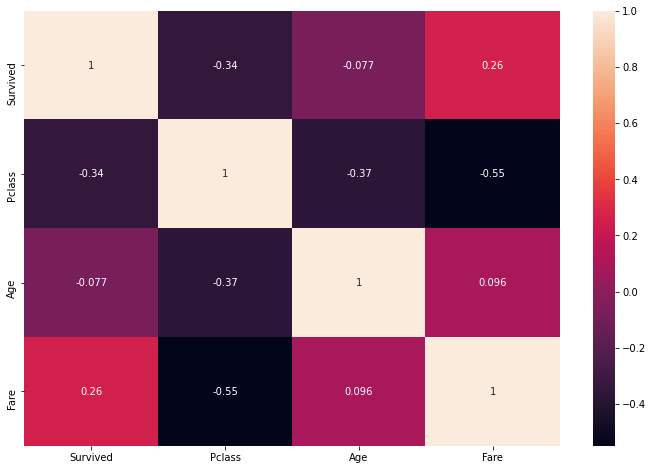

In [0]:
##using heat-maps to observe the correlation amaong numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [0]:
## getting the frequency of elements present in categorical data

for c in categorical_data:
  print(data[c].value_counts(), '\n')

3    491
1    216
2    184
Name: Pclass, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 



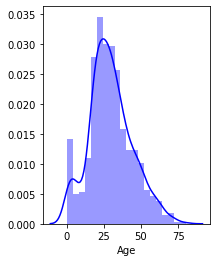

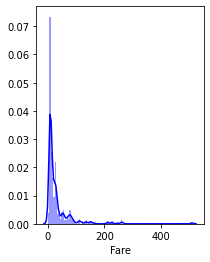

In [0]:
## plotting histogram for Numerical data analysis

for n in numerical_data:
  fig, ax1 = plt.subplots(figsize=(3,4))
  sns.distplot(data[n], kde=True, color='blue', bins='auto')

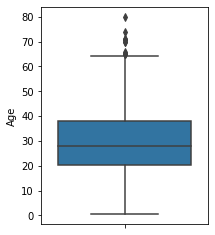

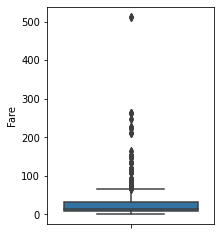

In [0]:
## Here, use only float64 dtypes column as they are only our numerical data
for n in numerical_data:
  fig, ax1 = plt.subplots(figsize=(3,4))
  sns.boxplot(y=data[n]) 

The boxplot above shows that the dataset contains some outliers. The two columns contain the outlier, i.e., `Age`, `Fare`. You learned a lot of techniques(Trimming, dropping) for handling outliers in the previous chapter. 

But here, you can use [RobustScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) transformer that does not remove the outliers but uses scale features that are robust to outliers.

Note: 
      
  `You do not add the dropping rows action in the pipeline in the form of the transformer as the transformer only transforms the data but does not cause the schema for both training and testing dataset to be changed. So, outliers handling is mostly done outside the pipeline if you are dropping them. But, it does not mean you can't add or remove features as it does not cause in the rows of data changed in both test and train data. You can also create your own custom transformer for handling those data but you need to feed the transformed data to the pipeline not include it in your pipeline.`

### DATA PREPROCESSING 

Here, you mainly do the things of `Feature Engineering` like `Feature Selection`, `Feature Scaling`, `Categorical Transformation`, `Mathematical Transformation`, `Dimension Reduction` that you learned in the previous chapters.

You can through the link, [Dataset transformations](https://scikit-learn.org/stable/data_transforms.html), for learning different tools available for data transformation in `sklearn`.

There are transformers like [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for categorical transformation and also `SimpleImputer` for handling missing values, but for making you familiar with custom transformer, the custom transformer is built for categorical transformations and handling missing values in categorical data. 

In [0]:
"""
Creating CategoricaImputation tranformers 
to fill the categorical features Nan values with most frequent obsevations
"""
class CategoricalImputation(TransformerMixin):

  def __init__(self, categorical_data):
    self.categorical_data = categorical_data ##list of categorical features with nan values
  
  def fit(self, X, y=None):

    return self
  
  def transform(self, X):

    for c in self.categorical_data:
      if X[c].isnull().sum()>0:
        X[c]=X[c].fillna(X[c].mode()) ## filling nan values with most frequent observations
    
    return X
    


In [0]:
## creating transformer for transforming categorical data into numerical data 
class DummyTransformer(TransformerMixin):
  def __init__(self, categorical_data):
    self.categorical_data = categorical_data

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    ##using pd.get_dummies to convert categorical data inot numerical one
    X = pd.get_dummies(X, columns=self.categorical_data, prefix=self.categorical_data)
    return X

Now, Let's create a pipeline for each transformer.

In [0]:
## pipeline for handling categorical data
categorical_transformer = Pipeline(steps=[
                ('categorical_impute', CategoricalImputation(categorical_data)),                          
                ('creating_dummy_features', DummyTransformer(categorical_data)),          
                ])

In [0]:
## observing how our looks after categorical transformation
df1 = categorical_transformer.fit_transform(data)

df1.head()

,Survived,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,PC 17599,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,113803,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,373450,8.0500,0,0,1,0,1,0,0,1


In [0]:
df1.isnull().sum()


Survived        0
Age           177
Ticket          0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

As mentioned above in the note of `FeatureUnion`, there is an estimator named `ColumnTransformer` that helps to transformation column separately. Here, for numerical data transformation, you need to use it.

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

## creating numerical transformer for numerical transformation

numerical_transformer = ColumnTransformer([('num', Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),                                                     
    ('numerical_transformer', RobustScaler())                                                    
]), numerical_data)])

In [0]:
## observing how our looks after numerical transformation
df2 = numerical_transformer.fit_transform(data)
df2[0]


array([-0.46153846, -0.3120106 ])

In [0]:
##checking the null values are imputed or not
np.isnan(df2).any().sum()

0

In [0]:
##final data preprocessing pipeline
preprocessed = Pipeline(steps=[
                ('categorical', categorical_transformer),
                ('numerical', numerical_transformer)
                
              ])

df = preprocessed.fit_transform(data)
print(df.shape)
df

(891, 2)


array([[-0.46153846, -0.3120106 ],
       [ 0.76923077,  2.46124229],
       [-0.15384615, -0.28277666],
       ...,
       [ 0.        ,  0.38960398],
       [-0.15384615,  0.67328148],
       [ 0.30769231, -0.29035583]])

In [0]:
##checking any null values
np.isnan(df).any().sum()



0

### Train Test Split

Here, splitting the dataset using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method.

In [0]:
from sklearn.model_selection import train_test_split
##separating target value form original dataset and dropping it
Y = data['Survived']
X = data.drop(columns=['Survived'])
print (X.shape, Y.shape)

(891, 6) (891,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

## MODEL TRAINING AND TUNING

here, you train your data sets on deifferent modelsand choose the best model. You learned about hyperparameter search in the previous chapter. Here, we use the grid search method for hyper parameters search to find the best parameters for our model.

Let's first start with simple `Logistic regression` and observe the its results. Then, we try on different models along with it.

The different models on which the dataset gets trained on are:

1. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

2. [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

3. [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

4. [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [0]:
## importing different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#### Starting with simple Logistic Regression

In [0]:
##using make_pipeline to create pipeline
pipe = make_pipeline(preprocessed, LogisticRegression())
pipe

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('categorical',
                                  Pipeline(memory=None,
                                           steps=[('categorical_impute',
                                                   <__main__.CategoricalImputation object at 0x7fa4f5633780>),
                                                  ('creating_dummy_features',
                                                   <__main__.DummyTransformer object at 0x7fa4f5633b00>)],
                                           verbose=False)),
                                 ('numerical',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse...
                                                                                                 with_scaling=True))],
             

In [0]:
##fitting the training dataset in the modelling pipeline
pipe.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('categorical',
                                  Pipeline(memory=None,
                                           steps=[('categorical_impute',
                                                   <__main__.CategoricalImputation object at 0x7fa4f5633780>),
                                                  ('creating_dummy_features',
                                                   <__main__.DummyTransformer object at 0x7fa4f5633b00>)],
                                           verbose=False)),
                                 ('numerical',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse...
                                                                                                 with_scaling=True))],
             

In [0]:
## getting score of model on the test set
pipe.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.6457399103139013

In [0]:
##Getting predictions on test set
pred = pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
##getting the classification report
from sklearn.metrics import classification_report

report = classification_report(pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.63      0.76       195
           1       0.23      0.79      0.36        28

    accuracy                           0.65       223
   macro avg       0.59      0.71      0.56       223
weighted avg       0.86      0.65      0.71       223



In [0]:
##getting the confusidon_matrix
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, pred)
print(c_matrix)

[[122   6]
 [ 73  22]]


You have seen how the steps like data preprocessing, modeling, scoring, and prediction capabilities consolidated into one single-engine. It means you only need to use an instance of `Pipeline` to get scores and predictions of the model.

### Experimenting on multiple models

You know ML is an iterative process, and one of its major tasks is to select a model for different case scenarios. This model selection process the data scientists/ML engineers achieve after performing multiple experiments on different situations with various models. This whole process is called `spot-checking models`.


Here, we use the four different models mentioned above in the dataset to get the best model for the dataset.


In [0]:
## putting all model estimators in the list
classifiers = [ 
            LogisticRegression(), 
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            SVC()
          ]
classifiers

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=No

In [0]:
## stores the best model among the three used models
best_pipe = []
## best_score is to compare the values of scores of different models 
## and store the best one 
best_score = 0

for model in classifiers:
  ## pipeline containing both preproceesed transformer and estimator

  pipe = Pipeline(steps=[ 
                ('preprocessed', preprocessed),
                ('classifier', model)
              ])
  
  ## model fitting
  pipe.fit(X_train, y_train)
  ##printing the model 
  print('\n', model)
  ## prinitng score of respective model
  print("model score:", pipe.score(X_test, y_test), '\n')
  ## comparing the score of models with each other to find the best suited model
  if pipe.score(X_test, y_test) > best_score:
        best_pipe = [pipe, pipe.score(X_test, y_test)]
        best_score = pipe.score(X_test, y_test)
  
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.6457399103139013 


 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model score: 0.6636771300448431 


 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=No

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

From the above output, you can observe that the best model is `SVC` with score `0.704`.



 

In [0]:
best_pipe

[Pipeline(memory=None,
          steps=[('preprocessed',
                  Pipeline(memory=None,
                           steps=[('categorical',
                                   Pipeline(memory=None,
                                            steps=[('categorical_impute',
                                                    <__main__.CategoricalImputation object at 0x7fa4f5633780>),
                                                   ('creating_dummy_features',
                                                    <__main__.DummyTransformer object at 0x7fa4f5633b00>)],
                                            verbose=False)),
                                  ('numerical',
                                   ColumnTransformer(n_jobs=None,
                                                     remainder='drop',
                                                     sp...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class

In [0]:
## getting the parameters key  
print(best_pipe[0].get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessed', 'classifier', 'preprocessed__memory', 'preprocessed__steps', 'preprocessed__verbose', 'preprocessed__categorical', 'preprocessed__numerical', 'preprocessed__categorical__memory', 'preprocessed__categorical__steps', 'preprocessed__categorical__verbose', 'preprocessed__categorical__categorical_impute', 'preprocessed__categorical__creating_dummy_features', 'preprocessed__numerical__n_jobs', 'preprocessed__numerical__remainder', 'preprocessed__numerical__sparse_threshold', 'preprocessed__numerical__transformer_weights', 'preprocessed__numerical__transformers', 'preprocessed__numerical__verbose', 'preprocessed__numerical__num', 'preprocessed__numerical__num__memory', 'preprocessed__numerical__num__steps', 'preprocessed__numerical__num__verbose', 'preprocessed__numerical__num__imputer', 'preprocessed__numerical__num__numerical_transformer', 'preprocessed__numerical__num__imputer__add_indicator', 'preprocessed__numerical__num__imputer__

In [0]:
## param_grid:
## consists of the dictionary of parameters names as keys and lists of parrameter settings to try values
param_grid = { 
    'classifier__n_estimators': [200, 350],
    'classifier__max_depth' : [4,5,6,7,8],
}

In [0]:
from sklearn.model_selection import GridSearchCV

## getting instance of GridSearchCV to perform exhaustive search
cv = GridSearchCV(estimator=best_pipe[0],param_grid=param_grid)
 
## fitting the data to perform exhaustive search
cv.fit(X_train, y_train)
##getting the best hyper parameters for the model   
print(cv.best_params_)  
## the best result produced by it
print(cv.best_score_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

{'classifier__max_depth': 7, 'classifier__n_estimators': 200}
0.7140724946695095


In [0]:
## observing the result of the  best parameters obtained from exhaustive search

print(cv.score(X_test, y_test))

0.6860986547085202


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
pred_ = cv.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76       195
           1       0.23      0.79      0.36        28

    accuracy                           0.65       223
   macro avg       0.59      0.71      0.56       223
weighted avg       0.86      0.65      0.71       223



In [0]:
print(confusion_matrix(y_test, pred))

[[122   6]
 [ 73  22]]
